![](Images/2022-11-29-16-30-31.png)

![](Images/2022-11-29-16-31-30.png)
# there are multiple types of troops
![](Images/2022-11-29-16-32-05.png)

![](Images/2022-11-29-16-32-49.png)
![](Images/2022-11-29-16-33-41.png)

In [68]:
# create the parameters file
# spaces and tabs don't affect the file
# to define a set or parameter start with "param" and define the set or a parameter variable "par:= .......''parameter value''......" last thing put ";" at the end
# note: if you want to define the index(set) for first time use 'param:' instead of 'param'
parameters_file = """

param:      I :       housingspace damage Trainingcostred TrainingcostDark Hitpoint Trainingtime:=
        barbarian          1         34         300              0           205         5
        Archer             1         28         600              0           52          6
        Giant              5         130        4200             0           1850        60
        Goblin             1         52         200              0           101         7
        Drag               20        310        22000            0           2900        180
        Edrag              30        300        36000            0           4200        360
        Baloon             5         236        550              0           840         30
        Pekka              25        310        18000            0           3500        180
        Wizard             4         230        4200             0           230         30
        Bowler             6         90         0                140         390         60
        Lava               30        16         0                570         7200        300
        Valkyrie           8         178        0                190         1450        90
        Hog                5         148        0                100         810         45
        Golem              30        40         0                350         5400        300
        Witch              12        180        0                275         480         180
        Minion             2         46         0                7           72          18;

param camp:= 286;

param RedElexir:= 2000000;

param DarkElexir:=200000;

"""

with open('12_params.dat', 'w') as file:
        file.write(parameters_file)

In [69]:
# import libraries
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt


In [70]:
# Initialize the model
model = pyo.AbstractModel()

# Declare the parameters and variables
# 1- sets
model.I = pyo.Set()

# 2- params
model.housingspace       = pyo.Param(model.I)
model.damage             = pyo.Param(model.I)
model.Trainingcostred    = pyo.Param(model.I)
model.TrainingcostDark   = pyo.Param(model.I)
model.Hitpoint           = pyo.Param(model.I)
model.Trainingtime       = pyo.Param(model.I)
model.camp               = pyo.Param()
model.RedElexir          = pyo.Param()
model.DarkElexir         = pyo.Param()

# 3- variables
model.x                 = pyo.Var(model.I, bounds=(0,300), within=pyo.NonNegativeIntegers, initialize=0)

# Declare the constraints
# If there is a summation or iteration inside the constraint put it in a function

def rule_1(model):
    return sum(model.x[i]*model.housingspace[i] for i in model.I) <= model.camp
model.c1 = pyo.Constraint(rule=rule_1)

def rule_2(model):
    return np.sum(model.x[i]*model.Trainingcostred[i] for i in model.I) <= model.RedElexir
model.c2 = pyo.Constraint(rule=rule_2)

def rule_3(model):
    return np.sum(model.x[i]*model.TrainingcostDark[i] for i in model.I) <= model.DarkElexir
model.c3 = pyo.Constraint(rule=rule_3)

# Declare the objective function
def obj_1(model):
    return np.sum(model.damage[i]* model.x[i] for i in model.I)

def obj_2(model):
    return np.sum(model.x[i]*model.Hitpoint[i] for i in model.I)

def obj_3(model):
    return np.sum(model.x[i]*model.Trainingtime[i] for i in model.I)

model.OF_1 = pyo.Objective(rule=obj_1, sense=pyo.maximize)
model.OF_2 = pyo.Objective(rule=obj_2, sense=pyo.maximize)
model.OF_3 = pyo.Objective(rule=obj_3, sense=pyo.minimize)

# Define the solver
solver = pyo.SolverFactory('glpk')

In [71]:
# NOTE   - IN PYOMO- we cant use more that one objective function so we have to deactivate 2 equations and just let one
model.OF_1.activate()
model.OF_2.deactivate()
model.OF_3.deactivate()

# create an instance of the model
instance = model.create_instance('12_params.dat')

# solve the problem
results = solver.solve(instance)

# write the results
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 16434.0
  Upper bound: 16434.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 17
  Number of nonzeros: 33
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.04399466514587402
# ----------------------------------------------------------
#   Solution Information
# -------------------------------

C:\Users\20100\AppData\Local\Temp\ipykernel_4336\1885617503.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.x[i]*model.Trainingcostred[i] for i in model.I) <= model.RedElexir
C:\Users\20100\AppData\Local\Temp\ipykernel_4336\1885617503.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.x[i]*model.TrainingcostDark[i] for i in model.I) <= model.DarkElexir
C:\Users\20100\AppData\Local\Temp\ipykernel_4336\1885617503.py:39: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.damage[i]* model.x[i] for i in model.I)
C:\Users\20100\AppDa

In [72]:
X = [i for i in instance.I]
Y = [pyo.value(instance.x[i] )for i in instance.I]
for x, y in zip(X, Y):
    print(f"{x : <10}:  {y}")

barbarian :  0.0
Archer    :  0.0
Giant     :  0.0
Goblin    :  2.0
Drag      :  0.0
Edrag     :  0.0
Baloon    :  0.0
Pekka     :  0.0
Wizard    :  71.0
Bowler    :  0.0
Lava      :  0.0
Valkyrie  :  0.0
Hog       :  0.0
Golem     :  0.0
Witch     :  0.0
Minion    :  0.0


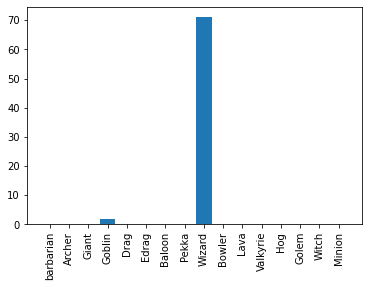

In [73]:
plt.bar(X,Y)
plt.xticks(rotation =90);